2D: dim(W) = 1 dus dim(v+W) = 1


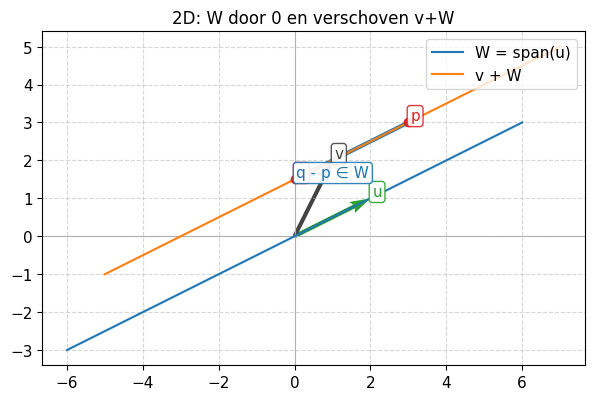

3D: dim(W) = 2 dus dim(v+W) = 2


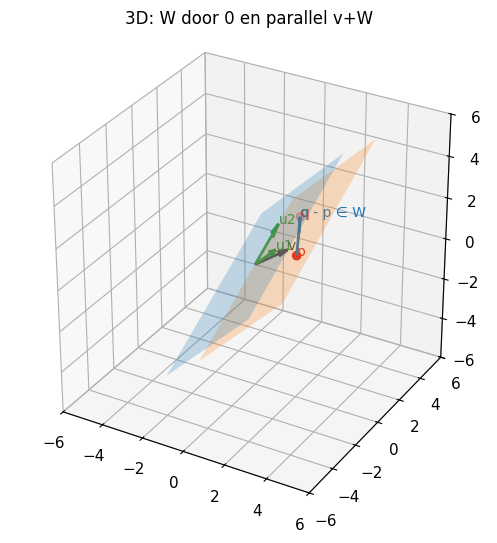

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (7.0, 5.5),
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "font.size": 11,
})

COL = {
    "w": "#1f77b4",
    "aw": "#ff7f0e",
    "vec": "#2ca02c",
    "point": "#d62728",
    "grid": "#b0b0b0",
    "fill_w": "#dce9ff",
    "fill_aw": "#ffe6c6",
}

# ============================================================
# Helper: "dimensie" van W = rang van een basis-matrix
# (kolommen = basisvectoren van W)
# ============================================================
def dim_subspace(W_basis_cols, tol=1e-12):
    s = np.linalg.svd(W_basis_cols, compute_uv=False)
    return int(np.sum(s > tol))

# ============================================================
# 2D: lijn W door 0 en verschoven lijn v+W
# ============================================================
u = np.array([2.0, 1.0])      # W = span(u)
v = np.array([1.0, 2.0])      # shift

W_basis = u.reshape(2, 1)
print("2D: dim(W) =", dim_subspace(W_basis), "dus dim(v+W) =", dim_subspace(W_basis))

t = np.linspace(-3, 3, 200)
W_points = np.outer(t, u)                  # t*u
A_points = v + np.outer(t, u)              # v + t*u

# Twee punten op de affiene lijn en hun verschil in W
p = v + 1.0 * u
q = v - 0.5 * u
dq = q - p                                 # ligt in W

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal", adjustable="box")
ax.axhline(0, color=COL["grid"], lw=0.8)
ax.axvline(0, color=COL["grid"], lw=0.8)
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_title("2D: W door 0 en verschoven v+W")

ax.plot(W_points[:, 0], W_points[:, 1], color=COL["w"], label="W = span(u)")
ax.plot(A_points[:, 0], A_points[:, 1], color=COL["aw"], label="v + W")

# Pijlen: u en v
ax.quiver(0, 0, u[0], u[1], angles="xy", scale_units="xy", scale=1, color=COL["vec"], linewidth=2)
ax.text(u[0] + 0.05, u[1] + 0.05, "u", color=COL["vec"],
        bbox=dict(facecolor="white", edgecolor=COL["vec"], boxstyle="round,pad=0.2", alpha=0.9))

ax.quiver(0, 0, v[0], v[1], angles="xy", scale_units="xy", scale=1, color="#444", linewidth=2)
ax.text(v[0] + 0.05, v[1] + 0.05, "v", color="#444",
        bbox=dict(facecolor="white", edgecolor="#444", boxstyle="round,pad=0.2", alpha=0.9))

# Punten p, q en verschil q-p (in W)
ax.scatter([p[0], q[0]], [p[1], q[1]], color=COL["point"], zorder=3)
ax.text(p[0] + 0.05, p[1] + 0.05, "p", color=COL["point"],
        bbox=dict(facecolor="white", edgecolor=COL["point"], boxstyle="round,pad=0.2", alpha=0.9))
ax.text(q[0] + 0.05, q[1] + 0.05, "q", color=COL["point"],
        bbox=dict(facecolor="white", edgecolor=COL["point"], boxstyle="round,pad=0.2", alpha=0.9))

ax.quiver(p[0], p[1], dq[0], dq[1], angles="xy", scale_units="xy", scale=1, color=COL["w"], linewidth=2)
ax.text(p[0] + dq[0] + 0.05, p[1] + dq[1] + 0.05, "q - p ∈ W", color=COL["w"],
        bbox=dict(facecolor="white", edgecolor=COL["w"], boxstyle="round,pad=0.2", alpha=0.9))

ax.legend(loc="upper right")
plt.show()


## ============================================================
## 3D: vlak W door 0 en parallel vlak v+W
## ============================================================
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

u1 = np.array([1.0, 0.0, 1.0])
u2 = np.array([0.0, 2.0, 1.0])
v3 = np.array([1.0, 1.0, 0.5])

W_basis_3d = np.column_stack([u1, u2])     # 3×2
print("3D: dim(W) =", dim_subspace(W_basis_3d), "dus dim(v+W) =", dim_subspace(W_basis_3d))

# Parametrisatie: a*u1 + b*u2
a = np.linspace(-2, 2, 30)
b = np.linspace(-2, 2, 30)
A, B = np.meshgrid(a, b)

# Vlakken
XW = A * u1[0] + B * u2[0]
YW = A * u1[1] + B * u2[1]
ZW = A * u1[2] + B * u2[2]

XA = v3[0] + XW
YA = v3[1] + YW
ZA = v3[2] + ZW

fig = plt.figure(figsize=(7.5, 6.2))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("3D: W door 0 en parallel v+W")

# Vlakken met lichte alpha
ax.plot_surface(XW, YW, ZW, alpha=0.25, linewidth=0, color=COL["w"], shade=False)
ax.plot_surface(XA, YA, ZA, alpha=0.25, linewidth=0, color=COL["aw"], shade=False)

# Pijlen: u1, u2, v
ax.quiver(0, 0, 0, u1[0], u1[1], u1[2], color=COL["vec"], linewidth=2)
ax.text(u1[0], u1[1], u1[2], "u1", color=COL["vec"], fontsize=10)

ax.quiver(0, 0, 0, u2[0], u2[1], u2[2], color=COL["vec"], linewidth=2, alpha=0.9)
ax.text(u2[0], u2[1], u2[2], "u2", color=COL["vec"], fontsize=10)

ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color="#444", linewidth=2)
ax.text(v3[0], v3[1], v3[2], "v", color="#444", fontsize=10)

# Twee punten op v+W en hun verschil (in W)
p3 = v3 + 1.0*u1 - 0.5*u2
q3 = v3 - 0.5*u1 + 1.0*u2
d3 = q3 - p3

ax.scatter([p3[0], q3[0]], [p3[1], q3[1]], [p3[2], q3[2]], color=COL["point"], s=35)
ax.text(p3[0], p3[1], p3[2], "p", color=COL["point"], fontsize=10)
ax.text(q3[0], q3[1], q3[2], "q", color=COL["point"], fontsize=10)

ax.quiver(p3[0], p3[1], p3[2], d3[0], d3[1], d3[2], color=COL["w"], linewidth=2)
ax.text(p3[0] + d3[0], p3[1] + d3[1], p3[2] + d3[2], "q - p ∈ W", color=COL["w"], fontsize=10)

# As-limieten
lim = 6
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)

ax.set_box_aspect([1, 1, 1])
plt.show()

## Wat is een affiene deelruimte?
- Een affiene deelruimte van $\mathbb{R}^n$ is een verschoven lineaire deelruimte: $v + W = \{v + w \mid w \in W\}$, met $W$ een lineaire deelruimte en $v$ een vaste vector.
- $W$ heet de directionele ruimte (alle richtingen); $v$ bepaalt de positie/shift.
- Dimensioneel: $\dim(v+W) = \dim(W)$.
- Speciale gevallen:
  - $v \in W \Rightarrow v+W = W$ (niet echt verschoven).
  - $W = \{0\}$ geeft een enkel punt $\{v\}$.

### Herkennen of een verzameling affien is
- Neem twee punten $p,q$ in de verzameling; het verschil $q-p$ moet in één vaste lineaire ruimte $W$ liggen.
- Formeel: een deelverzameling $A$ is affien als $p,q \in A \Rightarrow p + t(q-p) \in A$ voor alle $t \in \mathbb{R}$ (dus het lijnstuk én de lijn door $p,q$ zitten er volledig in).
- Je kunt ook zeggen: $A$ is affien als $A - p = \{x-p \mid x \in A\}$ een lineaire deelruimte is voor één (dus voor elk) $p \in A$.

### Praktische checks
1) Kies een referentiepunt $p \in A$.
2) Verzamel de verschillen $q-p$ voor meerdere $q \in A$ en bouw de matrix $D = [q_1-p, \dots, q_k-p]$.
3) Controleer of alle verdere verschillen in de kolomruimte van $D$ liggen (via SVD/rang of oplossen van lineaire stelsels).
4) Dimensie van de affiene deelruimte = rang van $D$.

### Voorbeelden
- In 2D: een lijn die niet door de oorsprong gaat is $v + \operatorname{span}(u)$.
- In 3D: een vlak parallel aan een lineair vlak $W$ is $v + W$; elk verschil van twee punten ligt in $W$.

### Visuele intuïtie
- Je ziet steeds een "kader" (de richting $W$) dat je vrij kunt verschuiven via $v$, zonder de vorm of richting te veranderen.

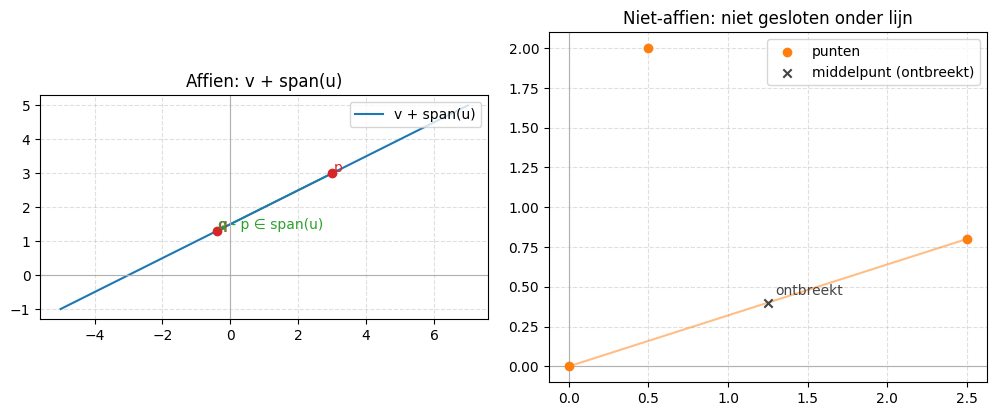

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (8.0, 4.2),
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "font.size": 10,
})

# Affien voorbeeld: lijn v + span(u)
u = np.array([2.0, 1.0])
v = np.array([1.0, 2.0])
t = np.linspace(-3, 3, 120)
aff_line = v.reshape(2,1) + t * u.reshape(2,1)
p = v + 1.0 * u
q = v - 0.7 * u
dq = q - p

# Niet-affien voorbeeld: drie punten die niet alle tussenliggende punten bevatten
pts_non_aff = np.array([[0.0, 0.0], [2.5, 0.8], [0.5, 2.0]])
mid = 0.5 * (pts_non_aff[0] + pts_non_aff[1])  # dit punt zou moeten meedoen als het affien was

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.0))

# Affien set
ax1.plot(aff_line[0], aff_line[1], color="#1f77b4", label="v + span(u)")
ax1.scatter([p[0], q[0]], [p[1], q[1]], color="#d62728", zorder=3)
ax1.text(p[0]+0.05, p[1]+0.05, "p", color="#d62728")
ax1.text(q[0]+0.05, q[1]+0.05, "q", color="#d62728")
ax1.quiver(p[0], p[1], dq[0], dq[1], angles="xy", scale_units="xy", scale=1, color="#2ca02c", width=0.004)
ax1.text(p[0]+dq[0]+0.05, p[1]+dq[1]+0.05, "q - p ∈ span(u)", color="#2ca02c")
ax1.axhline(0, color="#b0b0b0", lw=0.8)
ax1.axvline(0, color="#b0b0b0", lw=0.8)
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("Affien: v + span(u)")
ax1.legend(loc="upper right")
ax1.grid(True, linestyle="--", alpha=0.4)

# Niet-affien set
ax2.scatter(pts_non_aff[:,0], pts_non_aff[:,1], color="#ff7f0e", zorder=3, label="punten")
ax2.plot(pts_non_aff[[0,1],0], pts_non_aff[[0,1],1], color="#ff7f0e", alpha=0.5)
ax2.scatter(mid[0], mid[1], color="#444", marker="x", zorder=4, label="middelpunt (ontbreekt)")
ax2.text(mid[0]+0.05, mid[1]+0.05, "ontbreekt", color="#444")
ax2.axhline(0, color="#b0b0b0", lw=0.8)
ax2.axvline(0, color="#b0b0b0", lw=0.8)
ax2.set_aspect("equal", adjustable="box")
ax2.set_title("Niet-affien: niet gesloten onder lijn")
ax2.legend(loc="upper right")
ax2.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()